# Problem Statement - Suicide Rate Analysis

## Context
Close to 800 000 people die due to suicide every year, which is one person every 40 seconds. Suicide is a global phenomenon and occurs throughout the lifespan. Effective and evidence-based interventions can be implemented at population, sub-population, and individual levels to prevent suicide and suicide attempts. There are indications that for each adult who died by suicide there may have been more than 20 others attempting suicide.

## Objective
The objective of this case study is to find the patterns for increased suicide rates among different cohorts globally, across the socioeconomic spectrum by using exploratory data analysis.

## Data Dictionary
We will be using the dataset about suicide rates from 1985 to 2016. This dataset has the following attributes:

1. name: description
1. country: Country
1. year: Year
1. sex: Sex (male or female)
1. age: Suicide age range, ages divided into six categories
1. suicides_no: number of suicides
1. population: population of that sex, in that age range, in that country, and in that year
1. suicides/100k pop: Number of suicides per 100k population
1. gdp_for_year(\$): GDP of the country in that year in dollars
1. gdp_per_capita(\$): Ratio of the country’s GDP and its population
1. generation: Generation of the suicides in question, being possible 6 different categories

Questions to explore:
* Is the suicide rate more prominent in some age categories than others?
* Which countries have the most and the least number of suicides?
* What is the effect of the population on suicide rates?
* What is the effect of the GDP of a country on suicide rates?
* What is the trend of suicide rates across all the years?
* Is there a difference between the suicide rates of men and women?

# EDA

In [2]:
import pandas as pd

In [27]:
cols = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']

df = pd.read_csv('./master.csv', usecols=cols, thousands=',')

In [28]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


In [29]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [30]:
mapper = {
    'suicides/100k pop':'suicides_100k_pop',
    ' gdp_for_year ($) ':'gdp_for_year',
    'gdp_per_capita ($)':'gdp_per_capita'
}

df.rename(mapper=mapper, axis=1, inplace=True)

In [31]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_100k_pop', 'gdp_for_year', 'gdp_per_capita', 'generation'],
      dtype='object')

In [32]:
df.shape

(27820, 10)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides_100k_pop  27820 non-null  float64
 7   gdp_for_year       27820 non-null  int64  
 8   gdp_per_capita     27820 non-null  int64  
 9   generation         27820 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.1+ MB


In [34]:
df.describe()

,year,suicides_no,population,suicides_100k_pop,gdp_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


In [35]:
df.describe(include='object')

,country,sex,age,generation
count,27820,27820,27820,27820
unique,101,2,6,6
top,Mauritius,male,15-24 years,Generation X
freq,382,13910,4642,6408


In [38]:
import seaborn as sns

In [112]:
suicides_by_sex = df.groupby('sex').sum().loc[:,'suicides_no'].to_frame().reset_index()
suicides_by_sex

,sex,suicides_no
0,female,1559510
1,male,5188910


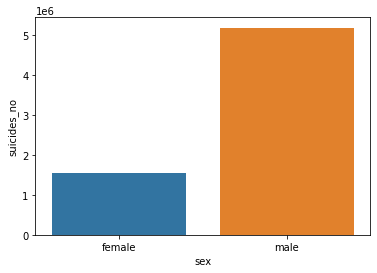

In [115]:
ax = sns.barplot(x="sex", y="suicides_no", data=suicides_by_sex)

<AxesSubplot:xlabel='suicides_no', ylabel='Count'>

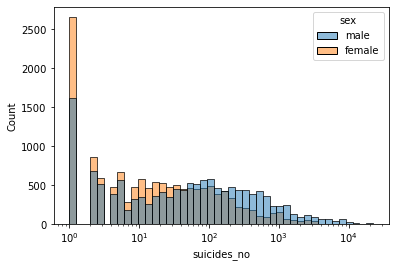

In [114]:
sns.histplot(data=df, x=df.suicides_no + 1, hue='sex', log_scale=True)

# Is the suicide rate more prominent in some age categories than others?

In [116]:
suicides_by_age = df.groupby('age').sum().loc[:,'suicides_no'].to_frame().reset_index()
suicides_by_age

,age,suicides_no
0,15-24 years,808542
1,25-34 years,1123912
2,35-54 years,2452141
3,5-14 years,52264
4,55-74 years,1658443
5,75+ years,653118


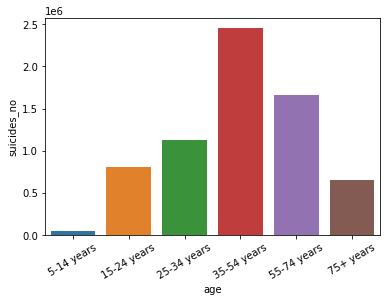

In [117]:
age_order = [
    '5-14 years',
    '15-24 years',
    '25-34 years',
    '35-54 years',
    '55-74 years',
    '75+ years',
]

ax = sns.barplot(data=suicides_by_age, x='age', y='suicides_no', order=age_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
None

People aged 35-54 are the most likely to commit suicide.

In [118]:
suicides_by_gen = df.groupby('generation').sum().loc[:,'suicides_no'].to_frame().reset_index()
suicides_by_gen

,generation,suicides_no
0,Boomers,2284498
1,G.I. Generation,510009
2,Generation X,1532804
3,Generation Z,15906
4,Millenials,623459
5,Silent,1781744


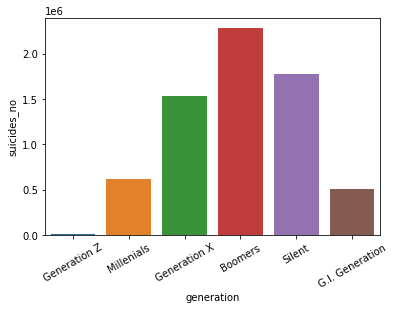

In [122]:
gen_order = [
    'Generation Z',
    'Millenials',
    'Generation X',
    'Boomers',
    'Silent',
    'G.I. Generation'
]

ax = sns.barplot(data=suicides_by_gen, x='generation', y='suicides_no', order=gen_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
None

Also, Boomers happen to be the generation that most commit suicide.

In [125]:
gen_df = df.groupby(['age','generation']).sum().loc[:,'suicides_no'].to_frame().reset_index()
gen_df

,age,generation,suicides_no
0,15-24 years,Generation X,394312
1,15-24 years,Millenials,414230
2,25-34 years,Boomers,304163
3,25-34 years,Generation X,640551
4,25-34 years,Millenials,179198
5,35-54 years,Boomers,1689019
6,35-54 years,Generation X,491614
7,35-54 years,Silent,271508
8,5-14 years,Generation X,6327
9,5-14 years,Generation Z,15906


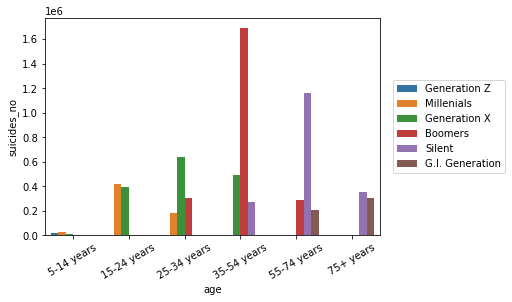

In [130]:
ax = sns.barplot(data=gen_df, x='age', y='suicides_no', hue='generation', order=age_order, hue_order=gen_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
None

This chart confirms that 35-54 year-old Boomers is the cohort most likely to commit suicide. The following cohort is 55-74 year-old Silents.

# Which countries have the most and the least number of suicides?

In [140]:
top_countries = df.groupby('country').sum()\
                .loc[:,'suicides_no'].to_frame()\
                .sort_values('suicides_no', ascending=False)\
                .reset_index()
top_countries.head(10)

,country,suicides_no
0,Russian Federation,1209742
1,United States,1034013
2,Japan,806902
3,France,329127
4,Ukraine,319950
5,Germany,291262
6,Republic of Korea,261730
7,Brazil,226613
8,Poland,139098
9,United Kingdom,136805


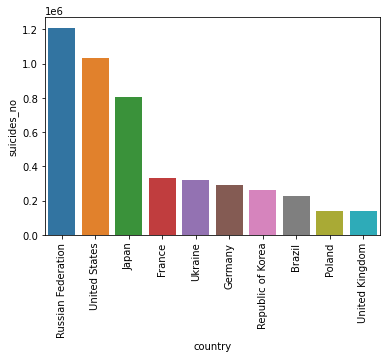

In [151]:
ax = sns.barplot(data=top_countries.head(10), x='country', y='suicides_no')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
None

In [146]:
top_countries.tail(10)

,country,suicides_no
91,Kiribati,53
92,Cabo Verde,42
93,Grenada,38
94,Oman,33
95,Macau,27
96,Maldives,20
97,Antigua and Barbuda,11
98,San Marino,4
99,Saint Kitts and Nevis,0
100,Dominica,0


<AxesSubplot:xlabel='suicides_no', ylabel='Count'>

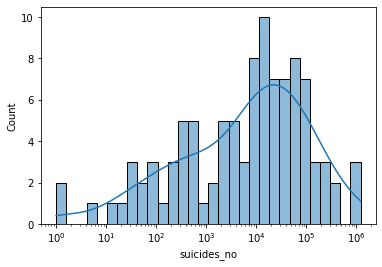

In [241]:
sns.histplot(data=top_countries, x=top_countries.suicides_no + 1, kde=True, log_scale=True, bins=30)

# What is the effect of the population on suicide rates?

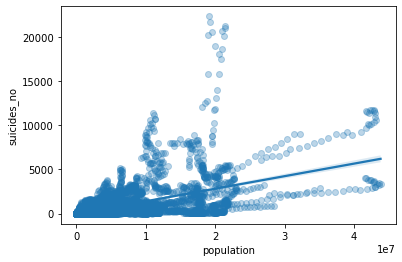

In [306]:
ax = sns.regplot(data=df, x='population', y='suicides_no', scatter_kws={'alpha':0.3})

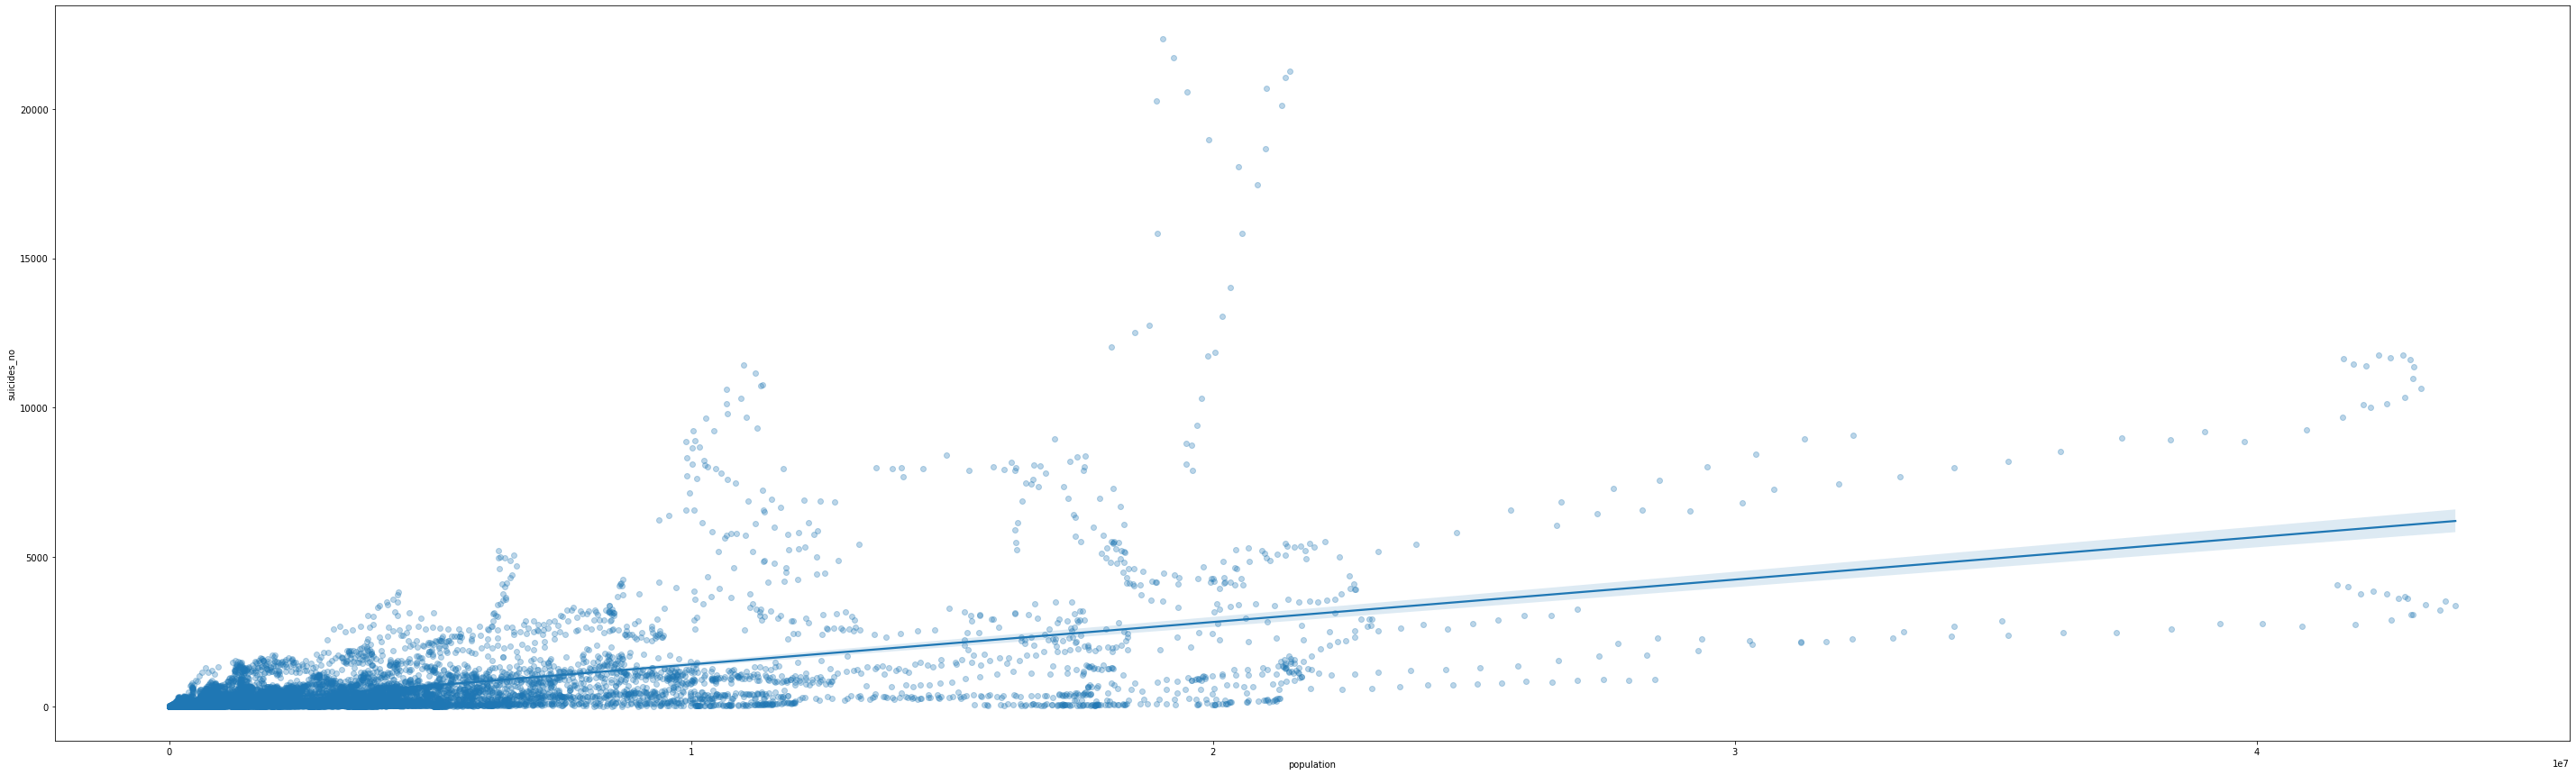

In [305]:
fig = plt.figure(figsize=(50,15))

ax = sns.regplot(data=df, x='population', y='suicides_no', scatter_kws={'alpha':0.3})

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

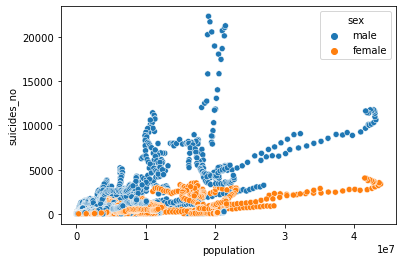

In [161]:
sns.scatterplot(data=df, x='population', y='suicides_no', hue='sex')

In [162]:
hue_map = {
    'Russian Federation':'Russian Federation',
    'United States':'United States',
    'Japan':'Japan',
}

df['country_hue'] = df.country.map(hue_map)
df.country_hue.fillna('other', inplace=True)
df.head()

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

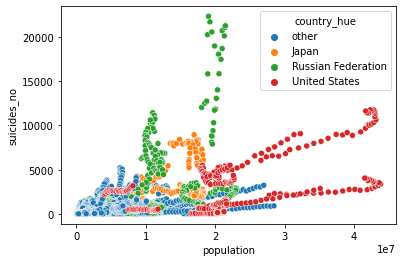

In [173]:
sns.scatterplot(data=df, x='population', y='suicides_no', hue='country_hue')

<AxesSubplot:>

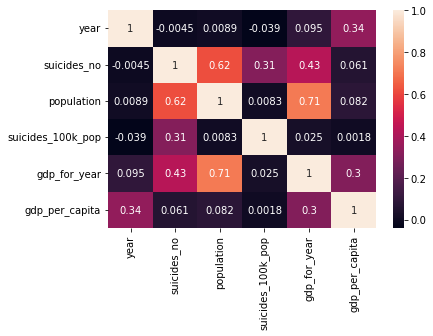

In [274]:
sns.heatmap(data=df.corr(), annot=True)

There is a strong relationship (0.62 Pearson correlation coefficient) between population size and suicide rates. The bigger the population, the higher the suicide reate.

# What is the effect of the GDP of a country on suicide rates?

<AxesSubplot:xlabel='gdp_for_year', ylabel='suicides_no'>

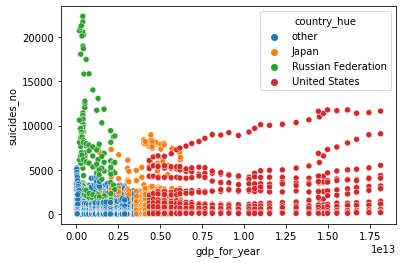

In [270]:
sns.scatterplot(data=df, x='gdp_for_year', y='suicides_no', hue='country_hue')

<AxesSubplot:xlabel='gdp_for_year', ylabel='suicides_no'>

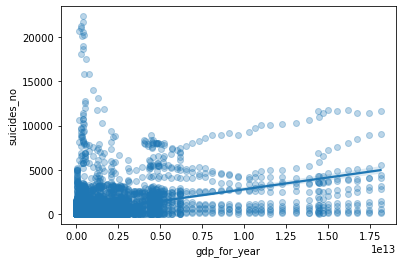

In [271]:
sns.regplot(data=df, x='gdp_for_year', y='suicides_no', scatter_kws={'alpha':0.3})

There is a fair (0.43 Pearson correlation coefficient) correlation between population size and suicides.

In [269]:
cty_yr = df.groupby(['country','year','gdp_for_year','gdp_per_capita'])\
    .agg({'suicides_no':'sum','population':'sum'})\
    .reset_index()
cty_yr['country_hue'] = cty_yr.country.map(hue_map)
cty_yr.country_hue.fillna('other', inplace=True)
cty_yr

,country,year,gdp_for_year,gdp_per_capita,suicides_no,population,country_hue
0,Albania,1987,2156624900,796,73,2709600,other
1,Albania,1988,2126000000,769,63,2764300,other
2,Albania,1989,2335124988,833,68,2803100,other
3,Albania,1992,709452584,251,47,2822500,other
4,Albania,1993,1228071038,437,73,2807300,other
...,...,...,...,...,...,...,...
2316,Uzbekistan,2010,39332770929,1533,1464,25651783,other
2317,Uzbekistan,2011,45915191189,1767,1640,25978049,other
2318,Uzbekistan,2012,51821573338,1964,1835,26381830,other
2319,Uzbekistan,2013,57690453461,2150,1950,26838924,other


<AxesSubplot:xlabel='gdp_for_year', ylabel='suicides_no'>

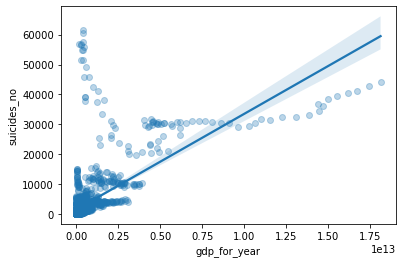

In [276]:
sns.regplot(data=cty_yr, x='gdp_for_year', y='suicides_no', scatter_kws={'alpha':0.3})

<AxesSubplot:xlabel='gdp_for_year', ylabel='suicides_no'>

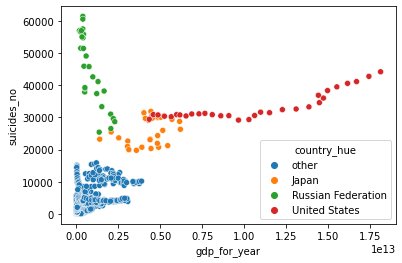

In [278]:
sns.scatterplot(data=cty_yr, x='gdp_for_year', y='suicides_no', hue='country_hue')

<AxesSubplot:xlabel='gdp_for_year', ylabel='suicides_no'>

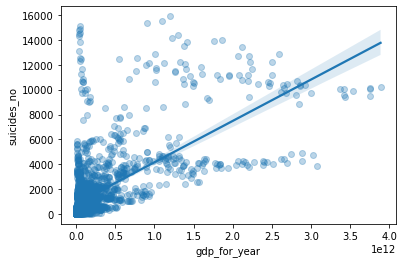

In [281]:
sns.regplot(data=cty_yr[cty_yr.country_hue == 'other'], x='gdp_for_year', y='suicides_no', scatter_kws={'alpha':0.3})

<AxesSubplot:>

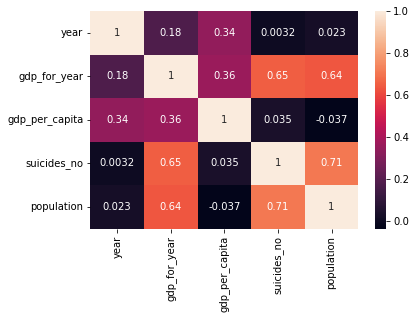

In [284]:
sns.heatmap(data=cty_yr[cty_yr.country_hue == 'other'].corr(), annot=True)

Summarizing the data by year, both GDP and population present strong positive relationships with suicide rates.

# What is the effect of the population on suicide rates?

In [292]:
yr_suic = cty_yr.groupby('year').sum().loc[:,'suicides_no'].to_frame()
yr_suic.tail()

,suicides_no
year,
2012,230160
2013,223199
2014,222984
2015,203640
2016,15603


<AxesSubplot:xlabel='year'>

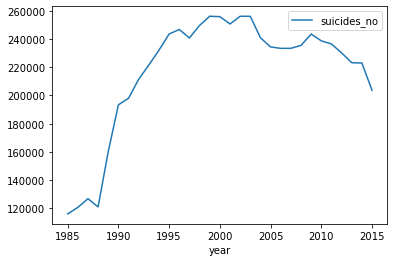

In [291]:
sns.lineplot(data=yr_suic[:-1]) # excluding the last element (2016), because the number is really low

Suicide rates have seem to pick up a trend in the 90s. In the last decade of the data rates seem to have been decreasing.

# Is there a difference between the suicide rates of men and women?

In [295]:
yr_suic_sex = df.groupby(['year','sex']).sum().loc[:,'suicides_no'].to_frame().reset_index()
yr_suic_sex.tail()

,year,sex,suicides_no
59,2014,male,171428
60,2015,female,47248
61,2015,male,156392
62,2016,female,3504
63,2016,male,12099


In [302]:
yr_suic_sex_pivot = pd.pivot_table(
    data=yr_suic_sex,
    values='suicides_no',
    index='year',
    columns='sex'
)
yr_suic_sex_pivot.tail()

sex,female,male
year,,
2012,53011,177149
2013,51459,171740
2014,51556,171428
2015,47248,156392
2016,3504,12099


<AxesSubplot:xlabel='year'>

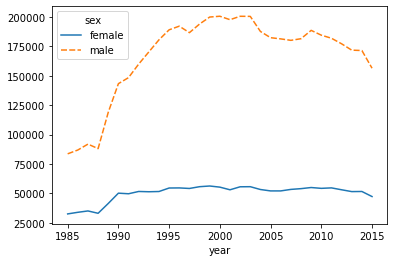

In [304]:
sns.lineplot(data=yr_suic_sex_pivot[:-1]) # excluding the last element (2016), because the number is really low

<AxesSubplot:xlabel='sex', ylabel='suicides_no'>

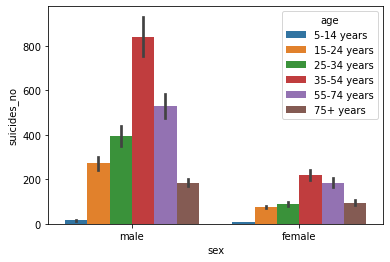

In [310]:
sns.barplot(data=df, x='sex', y='suicides_no', hue='age', hue_order=age_order)

Women commit less suicide than men.